# 1.c Distribution function for Euclid Space Mission 

In [1]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sqlite3 as sq
from astropy.table import vstack, Table
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
# Import neccessary libraries
%matplotlib inline 

In [3]:
# I connect to my created database:
con = sq.connect('Database_Juan.db')

23729


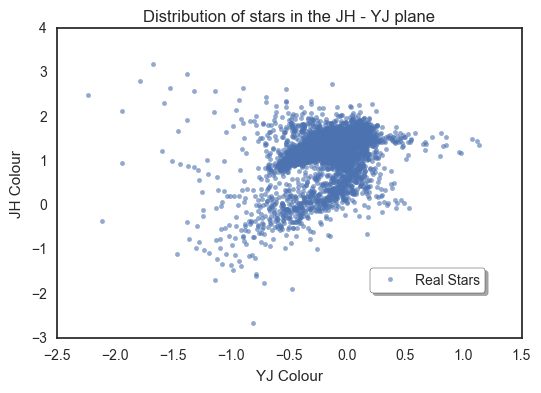

In [4]:
# Now I get the information from my "Colours" table and select only stars (where CLASS=-1) and their 
# respective colours. To avoid the problem with "nan" values I use an additional condition on the query which is
# 'IS NOT NULL'

query = """SELECT JH_colour, YJ_colour FROM Colours WHERE Colours.Class_H==-1.0 AND JH_colour IS NOT NULL"""

# I create a pandas data frame to use the data
get_colours = pd.read_sql(query, con)

# Just to see how big the sample is
print(len(get_colours))


# Plot the distribution of the original stars in the JH-YJ plane
plt.plot(get_colours.YJ_colour, get_colours.JH_colour, linestyle='none', marker='.', label="Real Stars", alpha=0.6)
plt.xlabel("YJ Colour")
plt.ylabel("JH Colour")
plt.title('Distribution of stars in the JH - YJ plane')
plt.legend(frameon=True, shadow=True, fancybox=True,bbox_to_anchor=(0.66, 0.25),prop={'size': 10}, loc=2)
plt.savefig('5.png')

# Methods to create a 2D distribution function of stars

In [5]:
from sklearn import mixture 

In [6]:
# Defin the number of stars to simulate
Required_sample = 100000
# Number of mixture components:
num_components = 10

In [7]:
# It's handy to have a numpy array for the data
x_train = np.vstack([get_colours.YJ_colour.values, get_colours.JH_colour.values])

# Find the traspose of the stacked data
x_train_T = x_train.T

# Apply the gaussian model to the data.
gaussian_mixture = mixture.GaussianMixture(num_components)

# Make the fit with the trasposed data
gaussian_mixture.fit(x_train_T)
modelled_stars = gaussian_mixture.sample(Required_sample)
YJ_data = modelled_stars[0][:,0]
JH_data = modelled_stars[0][:,1]

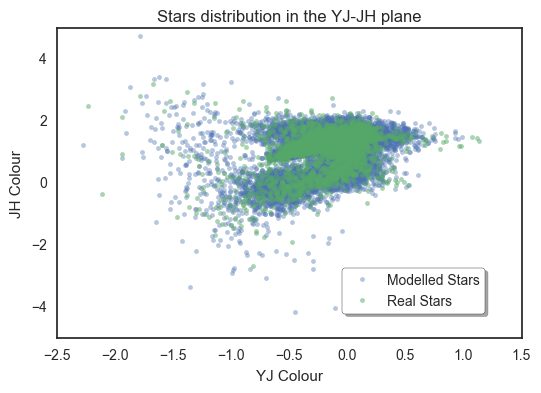

In [8]:
# Plot the simulated stars and the original sample
plt.plot(YJ_data,JH_data, marker='.', linestyle='none', label="Modelled Stars", alpha=0.4)
plt.plot(get_colours.YJ_colour, get_colours.JH_colour, linestyle='none', marker='.', label="Real Stars", alpha=0.5)
plt.xlabel("YJ Colour")
plt.ylabel("JH Colour")
plt.title('Stars distribution in the YJ-JH plane')
plt.legend(frameon=True, shadow=True, fancybox=True,bbox_to_anchor=(0.6, 0.25),prop={'size': 10}, loc=2)
plt.savefig('6.png')

# This can also be done with Bayesian Gaussian Mixture: 

In [9]:
# Now a numpy array for the data that will be used for the new method
x_ba_train = np.vstack([get_colours.YJ_colour.values, get_colours.JH_colour.values])

# Find the traspose of the stacked data
x_ba_train_T = x_train.T

# Apply the Bayessian Gaussian model to the data.I chose 5000 iterations which takes about 4 minutes to run 
# but which gives better results, also I chose a maximum number of gaussians of 30 but the fitting will be done 
# for a smaller number
gaussian_mixture_ba = mixture.BayesianGaussianMixture(30, max_iter=5000)

#Make the fit with the trasposed data
gaussian_mixture_ba.fit(x_ba_train_T)
modelled_stars_ba = gaussian_mixture_ba.sample(Required_sample)
YJ_data_ba = modelled_stars_ba[0][:,0]
JH_data_ba = modelled_stars_ba[0][:,1]

In [10]:
# Make the prediction
g = gaussian_mixture_ba.predict(x_ba_train_T)

#print len(np.unique(g))

14


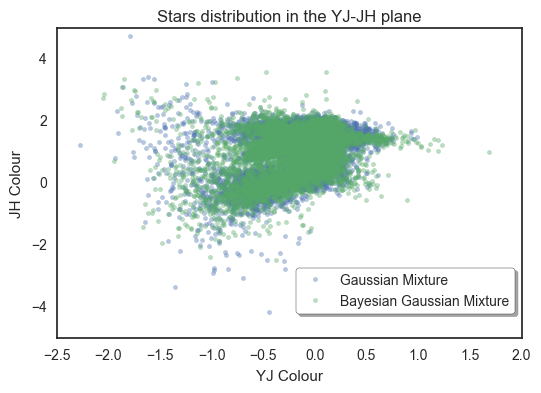

In [11]:
# Comparison between the two methods

plt.plot(YJ_data,JH_data, marker='.', linestyle='none', label="Gaussian Mixture", alpha=0.4)
plt.plot(YJ_data_ba,JH_data_ba, marker='.', linestyle='none', label="Bayesian Gaussian Mixture", alpha=0.4)
plt.xlabel("YJ Colour")
plt.ylabel("JH Colour")
plt.title('Stars distribution in the YJ-JH plane')
plt.legend(frameon=True, shadow=True, fancybox=True,bbox_to_anchor=(0.5, 0.25),prop={'size': 10}, loc=2)
plt.savefig('7.png')